In [4]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

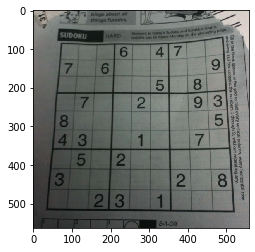

In [5]:
image = cv2.imread("DATA/sudoku.png")
plt.imshow(image)
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
edges = cv2.Canny(gray, 50, 150, apertureSize = 3)
lines = cv2.HoughLines(edges, 1, np.pi/180, 200 )

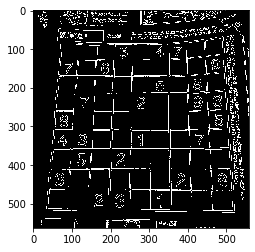

In [6]:
plt.imshow(edges, "gray")

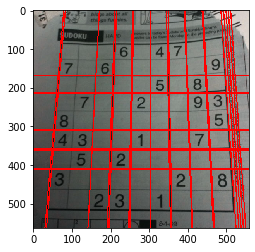

In [7]:
for line in lines:
    rho, theta = line[0]
    a = np.cos(theta)
    b = np.sin(theta)
    x0 = a*rho
    y0 = b*rho
    x1 = int(x0 + 1000*(-b))
    y1 = int(y0 + 1000*(a))
    x2 = int(x0 - 1000*(-b))
    y2 = int(y0 - 1000*(a))
    cv2.line(image,(x1, y1), (x2, y2), (255,0,0), 2)
    
plt.imshow(image)

Probabilistic Hough Line Transform

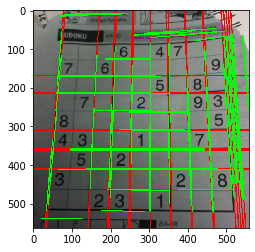

In [8]:
Lines = cv2.HoughLinesP(edges, 1, np.pi/180, 100, minLineLength = 100, maxLineGap = 10)
for line in Lines:
    x1, y1, x2, y2 = line[0]
    cv2.line(image, (x1, y1), (x2, y2), (0,255,0), 2)
    
plt.imshow(image)

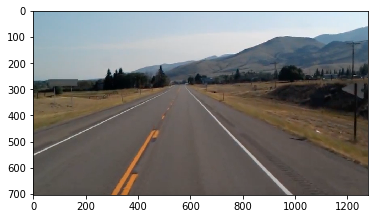

In [9]:
image_lane = cv2.imread("DATA/road_lane")
image_lane = cv2.cvtColor(image_lane, cv2.COLOR_BGR2RGB)
plt.imshow(image_lane)

In [10]:
#region of interest
height = image_lane.shape[0]
width = image_lane.shape[1]
ROI_vertices = [(0, height), (width/2, height/2), (width, height)]

def ROI(img, vertices):
    mask = np.zeros_like(img)
#     channel_count = img.shape[2]
    match_mask_color = 255
    cv2.fillPoly(mask, vertices, match_mask_color)
    masked_image = cv2.bitwise_and(img, mask)
    return masked_image

# masked_image = ROI(image_lane, np.array([ROI_vertices], np.int32))
# plt.imshow(masked_image)

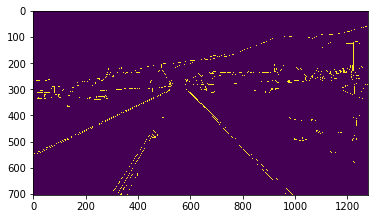

In [11]:
gray_lane = cv2.cvtColor(image_lane, cv2.COLOR_BGR2GRAY)
canny_lane = cv2.Canny(gray_lane, 30, 150)
plt.imshow(canny_lane)
masked_image = ROI(canny_lane, np.array([ROI_vertices], np.int32))

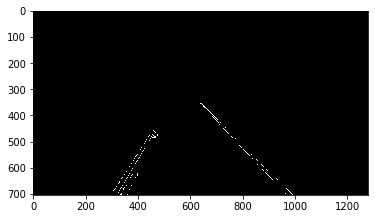

In [12]:
plt.imshow(masked_image, "gray")

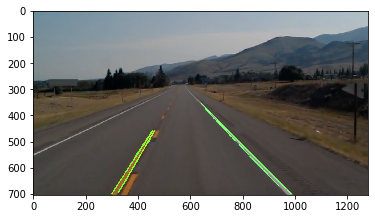

In [13]:
lines = cv2.HoughLinesP(masked_image, rho = 6, theta = np.pi/60, threshold = 160, lines = np.array([]), minLineLength = 40, maxLineGap =25)

def draw_the_lines(img, lines):
    img = np.copy(img)
    blank_image = np.zeros((img.shape[0], img.shape[1], 3), dtype = np.uint8)
    for line in lines:
        for x1, y1, x2, y2 in line:
            cv2.line(blank_image, (x1, y1), (x2, y2), (0,255,0), thickness = 3)
            
    img = cv2.addWeighted(img, 0.8, blank_image, 1, 0.0)
    return img

image_with_lines = draw_the_lines(image_lane, lines)
plt.imshow(image_with_lines)
    

In [14]:
def process(image):
    height = image_lane.shape[0]
    width = image_lane.shape[1]
    ROI_vertices = [(0, height), (width/2, height/2), (width, height)]
    gray_lane = cv2.cvtColor(image_lane, cv2.COLOR_BGR2GRAY)
    canny_lane = cv2.Canny(gray_lane, 30, 150)
    masked_image = ROI(canny_lane, np.array([ROI_vertices], np.int32))
    lines = cv2.HoughLinesP(masked_image, rho = 6, theta = np.pi/60, threshold = 160, lines = np.array([]), minLineLength = 40, maxLineGap =25)
    image_with_lines = draw_the_lines(image_lane, lines)
    return image_with_lines

cap = cv2.VideoCapture("road_lane_video.mp4")
while cap.isOpened():
    ret, frame = cap.read()
    frame = process(frame)
    cv2.imshow('Lane detection',frame)
    key = cv2.waitKey(25) & 0xFF
    if key == ord('q'):
        break

cap.release()
cv2.destroyAllWindows()

In [15]:
# importing libraries
import cv2
import numpy as np

# Create a VideoCapture object and read from input file
cap = cv2.VideoCapture('road_lane_video.mp4')

# Read until video is completed
while(cap.isOpened()):
	
# Capture frame-by-frame
    ret, frame = cap.read()
    frame = process(frame)
    if ret == True:
	# Display the resulting frame
        cv2.imshow('Frame', frame)

	# Press Q on keyboard to exit
        if cv2.waitKey(25) & 0xFF == ord('q'):
            break

# Break the loop
    else:
        break

# When everything done, release
# the video capture object
cap.release()

# Closes all the frames
cv2.destroyAllWindows()
